In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('position_gbk.csv',encoding='gbk')
df.head()

,positionId,city,companyId,firstType,secondType,education,industryField,positionAdvantage,positionName,positionLables,salary,workYear,bottom,top,avg
0,2537336,上海,8581,技术,数据开发,硕士,移动互联网,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生,7,9,8.0
1,2427485,上海,23177,技术,数据开发,本科,金融,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生,10,15,12.5
2,2511252,上海,57561,设计,数据分析,本科,移动互联网,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生,4,6,5.0
3,2427530,上海,7502,市场与销售,数据分析,本科,"企业服务,数据服务",五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生,6,8,7.0
4,2245819,上海,130876,技术,软件开发,本科,其他,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生,2,3,2.5


# 设置显示中文

In [18]:
plt.rcParams['font.sans-serif']=['SimHei']

# 设置显示负号

In [15]:
plt.rcParams['axes.unicode_minus']=False

# 常用可视化图形 matplotlib.pyplot  
- plot 折线图
- bar 柱形图
- hist 直方图
- box 箱线图
- kde 密度图
- scatter 散点图
- scatter_matrix 散点图矩阵
- pie 饼图

https://seaborn.pydata.org/examples/index.html

# 高级可视化图形 seaborn
## 分布
- distplot 概率分布图
- kdeplot 概率密度图
- jointplot 联合密度图
- pairplot 多变量图
## 分类
- boxplot 箱线图
- violinplot 提琴图
- barplot 柱形图
- factorplot 因子图
## 线性
- lmplot 回归图
- heatmap 热力图

# 图表元素
- title
- data
- x轴
  - x轴刻度 xticks
  - x轴标签 xlabel
- y轴
  - y轴刻度 yticks
  - y轴标签 ylabel

# 一、常用可视化图形

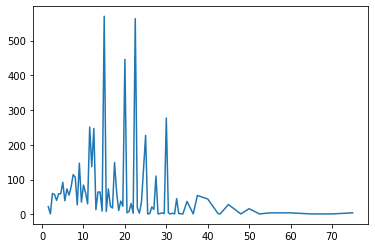

In [4]:
df.avg.value_counts().sort_index().plot()

In [26]:
PivotTable_city = df.pivot_table(index='city',columns='education',values='avg',aggfunc='count')

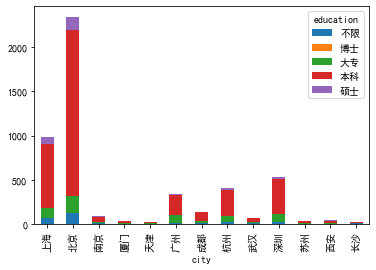

In [76]:
PivotTable_city.plot.bar(stacked=True)

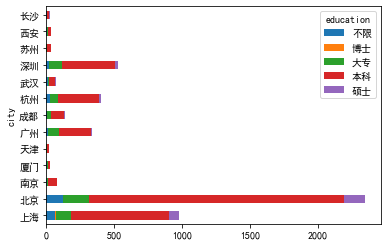

In [77]:
PivotTable_city.plot.barh(stacked=True)

In [49]:
#  unstack()函数, T 转置函数
education_avg = df.groupby('education').apply(lambda x:x.avg).unstack().T

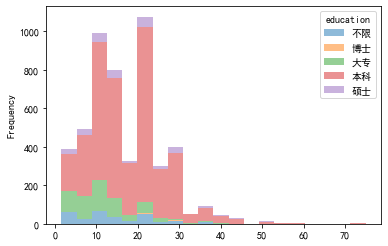

In [78]:
#  alpha 设置透明度，stacked=True 堆积,orientation='horizontal'横纵转置
education_avg.plot.hist(bins=20,alpha=0.5,stacked=True)

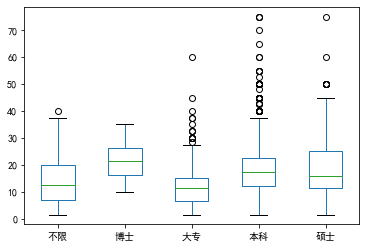

In [86]:
education_avg.plot.box()

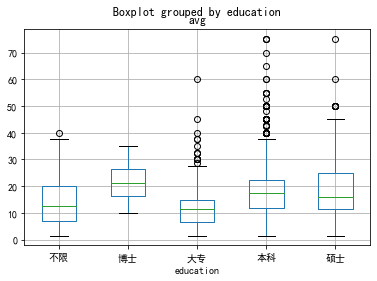

In [85]:
df.boxplot( column='avg',by='education')

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


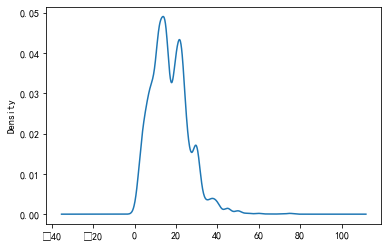

In [88]:
df.avg.plot.kde()

In [60]:
PivotTable_avg = df.pivot_table(index='avg',columns='education',values='positionId',aggfunc='count')

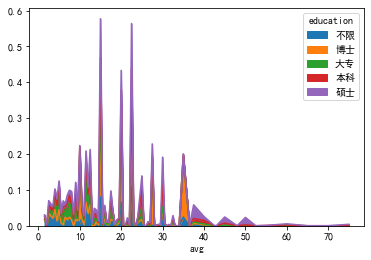

In [87]:
PivotTable_avg.plot.area()

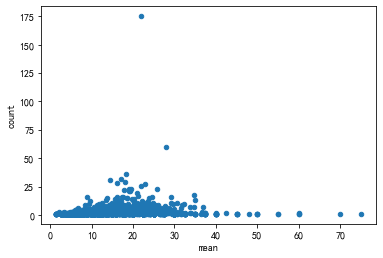

In [80]:
df.groupby('companyId').agg(['mean','count']).avg.plot.scatter(x='mean',y='count')

In [69]:
matrix = df.groupby('companyId').agg(['mean','count','max']).avg
matrix.head()

,mean,count,max
companyId,,,
43,11.500000,1,11.5
53,16.250000,4,20.0
62,17.125000,32,37.5
70,27.500000,1,27.5
91,29.227273,11,45.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B14168E908>,
      dtype=object)

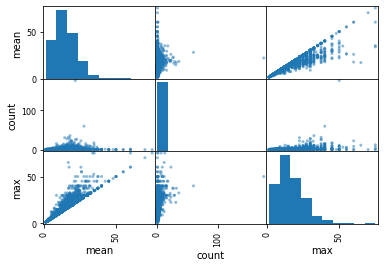

In [70]:
pd.plotting.scatter_matrix(matrix)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B141937448>,
      dtype=object)

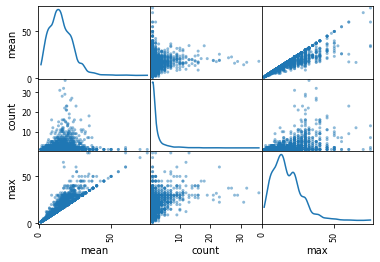

In [71]:
pd.plotting.scatter_matrix(matrix.query('count<50'),diagonal='kde',)

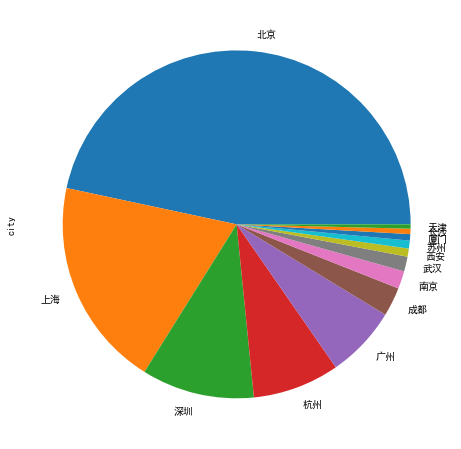

In [81]:
df.city.value_counts().plot.pie(figsize=(8,8))

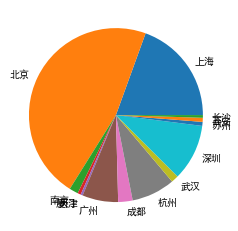

In [89]:
plt.pie(df.groupby('city').avg.count(),labels=df.groupby('city').avg.count().index)
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(-20, 20 + 1) instead
  


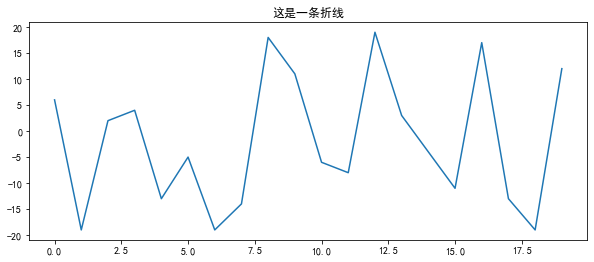

In [98]:
plt.figure(1,figsize=(10,4))
plt.plot(np.random.random_integers(-20,20,20))
plt.title('这是一条折线')
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(-20, 20 + 1) instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(-20, 20 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


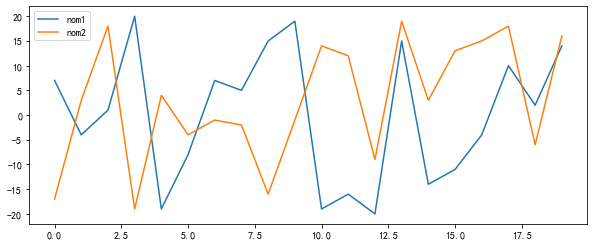

In [99]:
plt.figure(1,figsize=(10,4))
plt.plot(np.random.random_integers(-20,20,20),label='nom1')
plt.plot(np.random.random_integers(-20,20,20),label='nom2')
plt.legend()
plt.show()

## 绘制子图

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(-20, 20 + 1) instead
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(-20, 20 + 1) instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: This function is deprecated. Please call randint(-20, 20 + 1) instead
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: This function is deprecated. Please call randint(-20, 20 + 1) instead
  


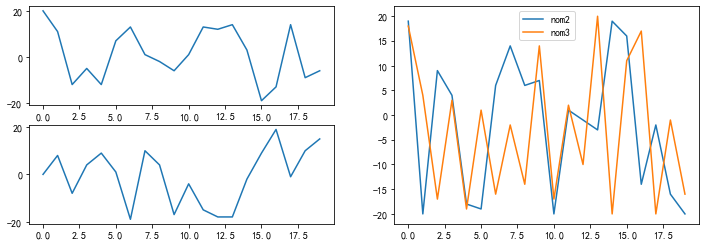

In [121]:
plt.figure(1,figsize=(12,4))
# 第一张图绘制
plt.subplot(2,2,1)
plt.plot(np.random.random_integers(-20,20,20),label='nom1')

# 第二张图绘制
plt.subplot(1,2,2)
plt.plot(np.random.random_integers(-20,20,20),label='nom2')
plt.plot(np.random.random_integers(-20,20,20),label='nom3')
plt.legend()

# 第三张图绘制
plt.subplot(2,2,3)
plt.plot(np.random.random_integers(-20,20,20),label='nom4')

plt.show()

In [106]:
data = df.groupby(['education','companyId']).agg(['mean','count']).avg.reset_index()
data.head()

,education,companyId,mean,count
0,不限,228,15.0,1
1,不限,280,15.0,1
2,不限,329,12.5,1
3,不限,347,22.5,1
4,不限,707,10.5,1


## 叠加图层

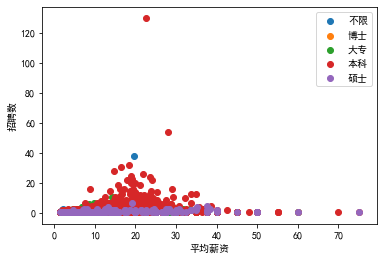

In [111]:
for edu,grouped in data.groupby('education'):
    x = grouped['mean']
    y = grouped['count']
    plt.scatter(x,y,label=edu)
plt.legend()
plt.xlabel('平均薪资')
plt.ylabel('招聘数')
plt.show()

# 二、高级可视化图形

## 1.分布型

In [18]:
df['order_dt'] = pd.to_datetime(df.order_dt,format='%Y%m%d')
rfm = df.pivot_table(index = 'user_id',
                     values = ['order_dt','order_amount','order_products'],
                     aggfunc = {'order_amount':'sum',
                                'order_products':'sum',
                                'order_dt':'max'
                               })
rfm['R'] = (rfm.order_dt-rfm.order_dt.max()) / np.timedelta64(1,'D')
rfm.rename(columns = {'order_products':'F','order_amount':'M'},inplace=True)
rfm.head()

In [ ]:
sns.joinplot(rfm.R,rfm.M)

In [ ]:
sns.joinplot(rfm.F,rfm.M,kind='reg')

In [7]:
sns.pairplot(rfm[['R','F','M']])

## 2.分类型

In [12]:
df = pd.read_csv('canyin.csv',encoding='gbk')
df.head()

,城市,类型,店名,点评,人均,口味,环境,服务
0,北京,私房菜,梧桐宇私房菜,45.0,80.0,7.3,7.3,7.1
1,北京,私房菜,小东北私房菜,1.0,35.0,6.9,6.9,6.9
2,北京,私房菜,辣家私房菜,1.0,NaN,6.9,6.9,6.9
3,北京,私房菜,鸿福天原,NaN,NaN,NaN,NaN,NaN
4,北京,私房菜,虾而美(北京)餐饮管理有限公司,NaN,NaN,NaN,NaN,NaN


In [24]:
plt.rcParams['font.sans-serif']=['SimHei']
df = pd.read_csv('canyin.csv',encoding='gbk')
df.head()

,城市,类型,店名,点评,人均,口味,环境,服务
0,北京,私房菜,梧桐宇私房菜,45.0,80.0,7.3,7.3,7.1
1,北京,私房菜,小东北私房菜,1.0,35.0,6.9,6.9,6.9
2,北京,私房菜,辣家私房菜,1.0,NaN,6.9,6.9,6.9
3,北京,私房菜,鸿福天原,NaN,NaN,NaN,NaN,NaN
4,北京,私房菜,虾而美(北京)餐饮管理有限公司,NaN,NaN,NaN,NaN,NaN


In [34]:
df2 = df.query('(城市=="北京") | (城市=="上海")')

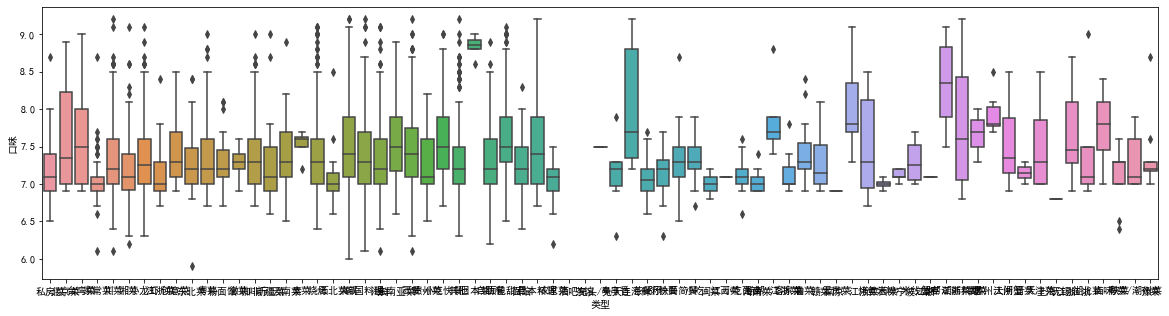

In [37]:
plt.figure(figsize=(20,5))
sns.boxplot(x='类型',y='口味',data=df)

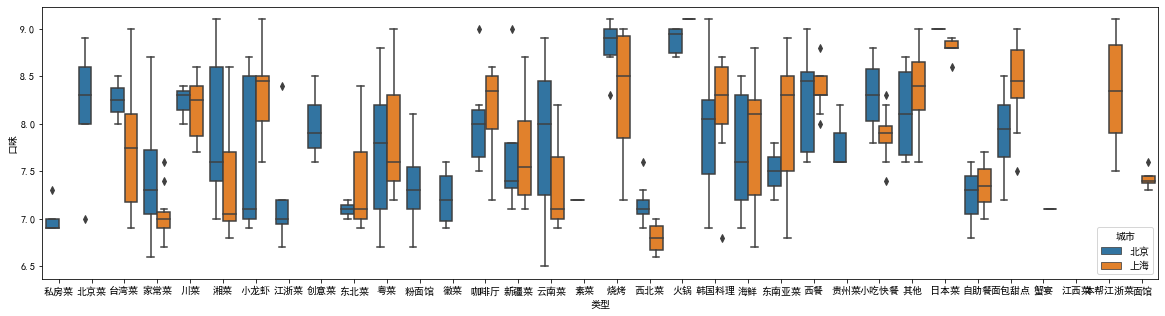

In [36]:
plt.figure(figsize=(20,5))
sns.boxplot(x='类型',y='口味',hue='城市',data=df2)

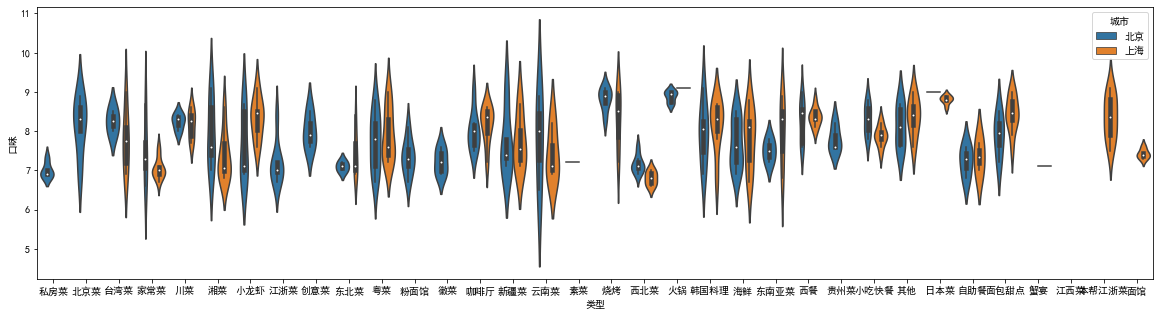

In [39]:
plt.figure(figsize=(20,5))
sns.violinplot(x='类型',y='口味',hue='城市',data=df2)

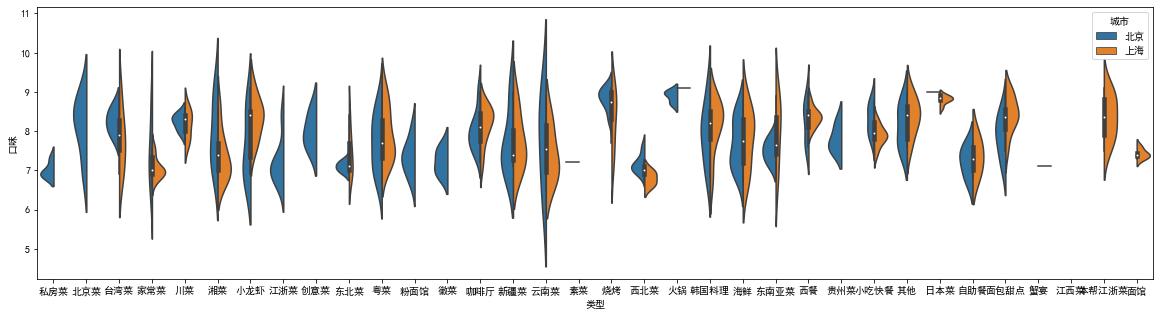

In [42]:
plt.figure(figsize=(20,5))
sns.violinplot(x='类型',y='口味',hue='城市',data=df2,split=True)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


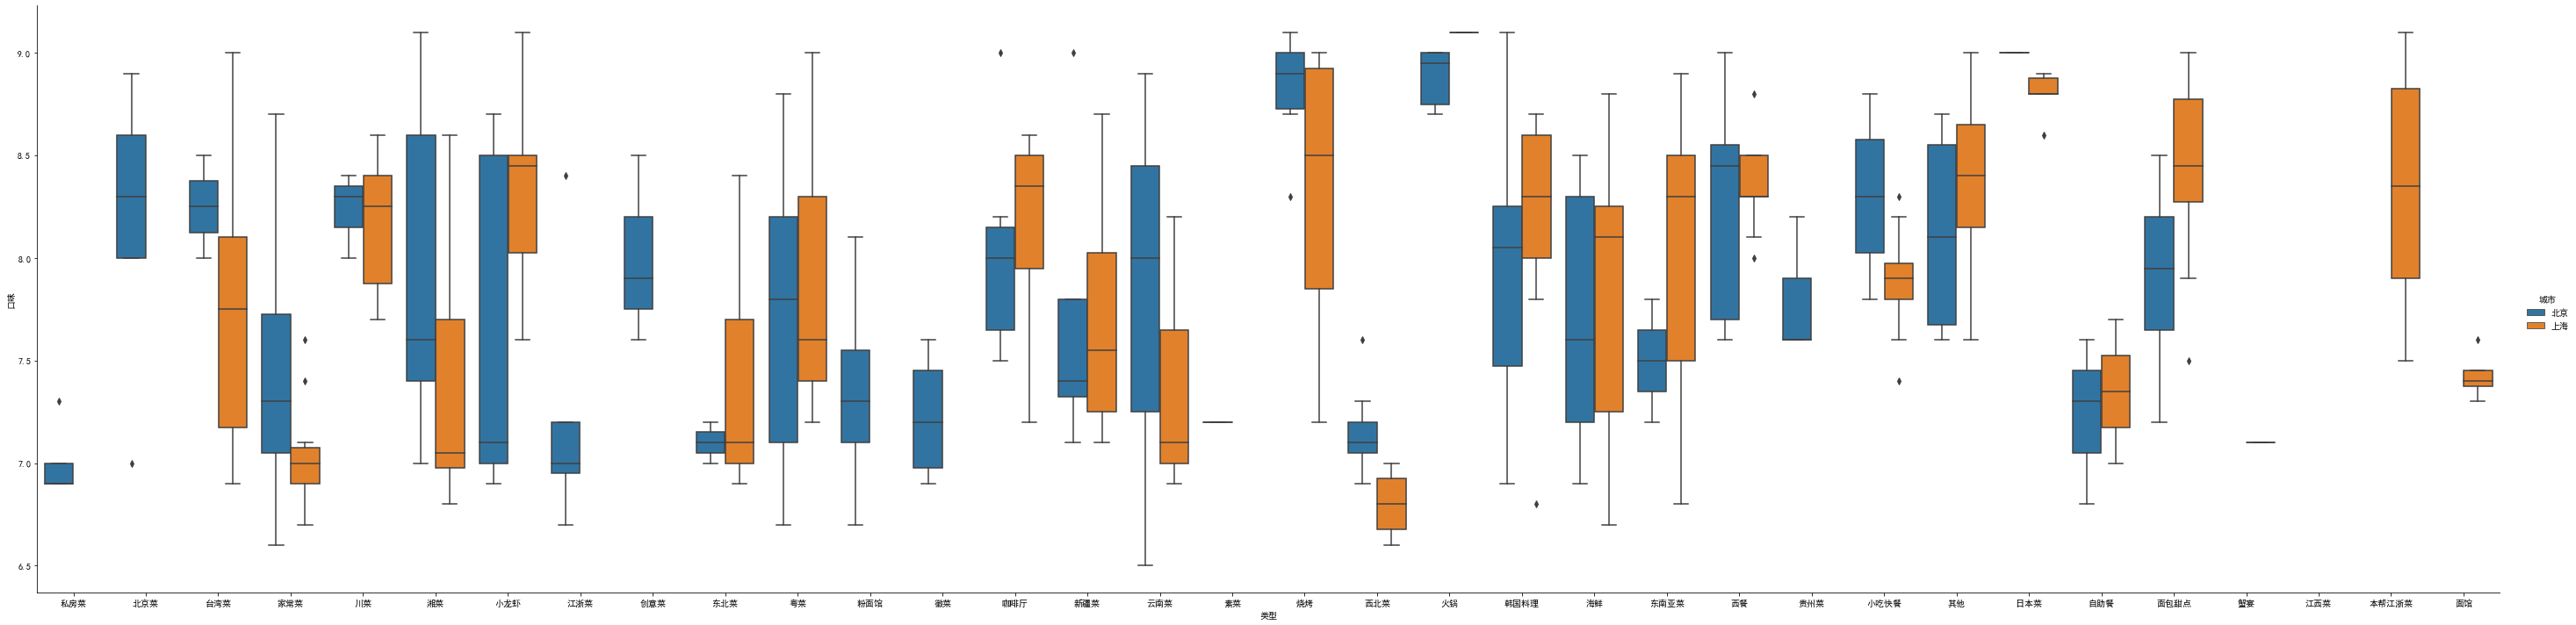

In [50]:
sns.factorplot(x='类型',y='口味',hue='城市',kind='box',data= df2,size=10,aspect=4)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


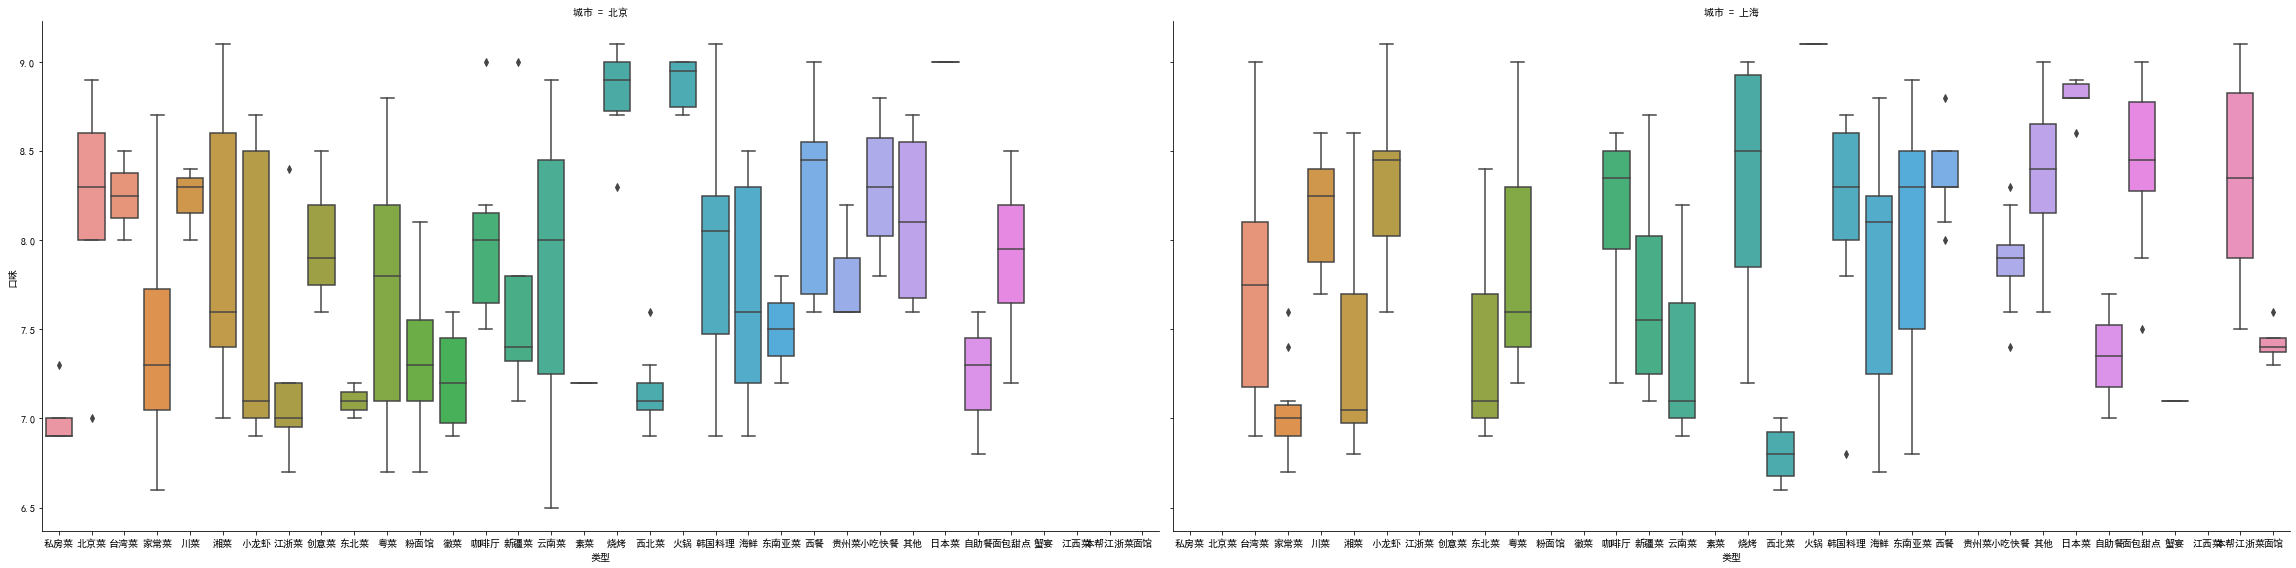

In [53]:
sns.factorplot(x='类型',y='口味',col='城市',kind='box',data= df2,size=8,aspect=2)

In [55]:
sns.factorplot(x='类型',y='口味',col='城市',kind='violin',data= df,size=8,aspect=2,col_wrap=4)

## 3.线性

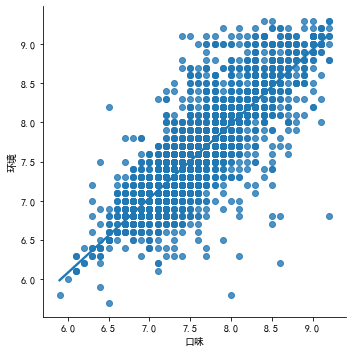

In [57]:
sns.lmplot(x='口味',y='环境',data=df)

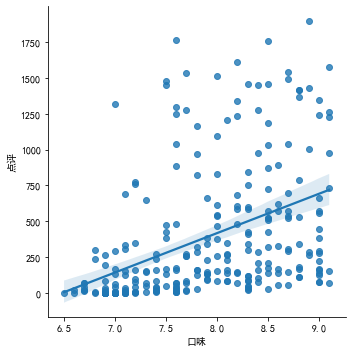

In [59]:
sns.lmplot(x='口味',y='点评',data=df2.query('点评<2000'))

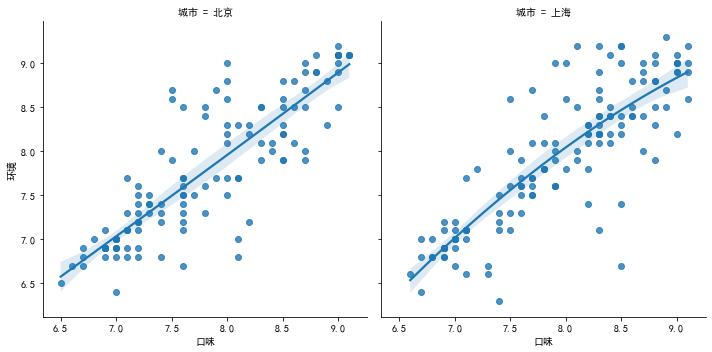

In [62]:
sns.lmplot(x='口味',y='环境',data=df2.query('点评<2000'),col='城市',order=2)

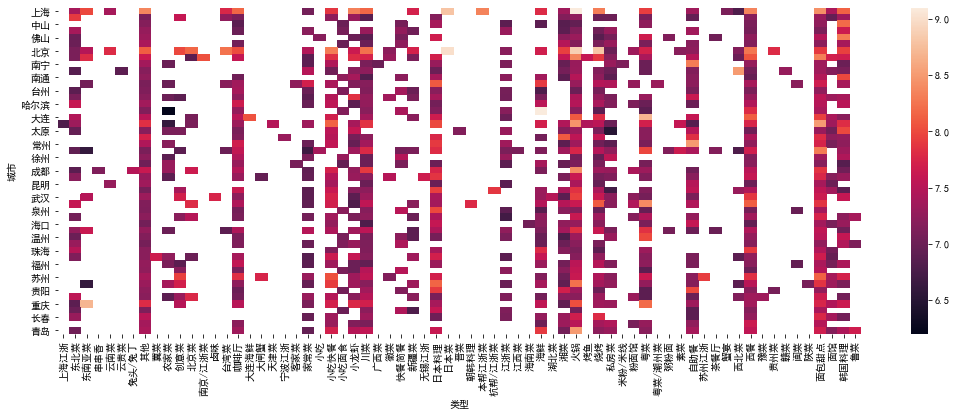

In [72]:
pt = df.pivot_table(index="城市",columns="类型",values="口味",aggfunc='mean')
plt.figure(figsize=(18,6))
sns.heatmap(pt)  # 通过设置annot=True，显示数字标签